# Project structre notes
- `other-stateful` - older implementation of q-learning with states
- `rl` - helper functions from https://github.com/wangjksjtu/rl-perturbed-reward

# Intro

This notebook runs through the main classes.

Based on:
- Adapting Virtual Embodiment Through Reinforcement Learning (Prossute et al.)
- Reinforcement Learning with Perturbed Rewards (Wang et al.)

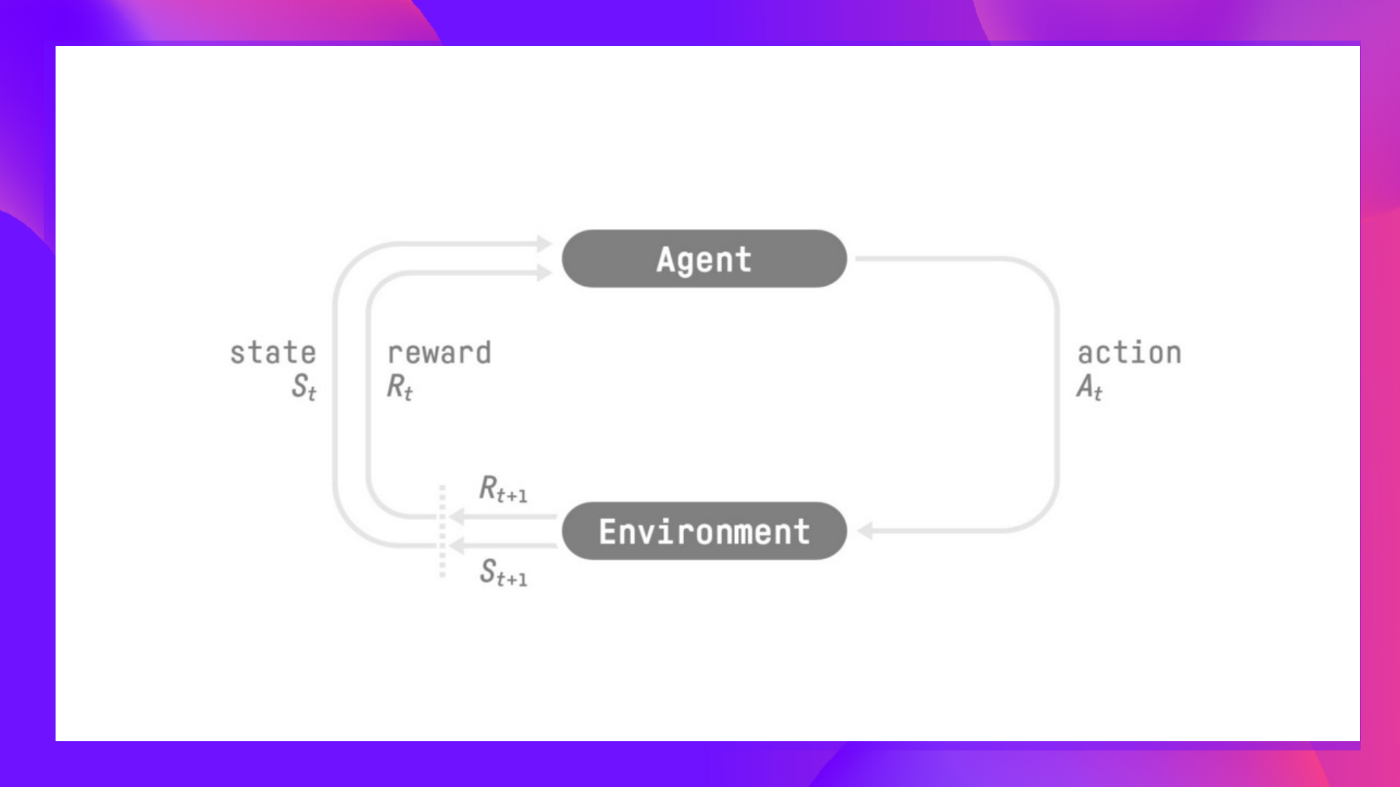

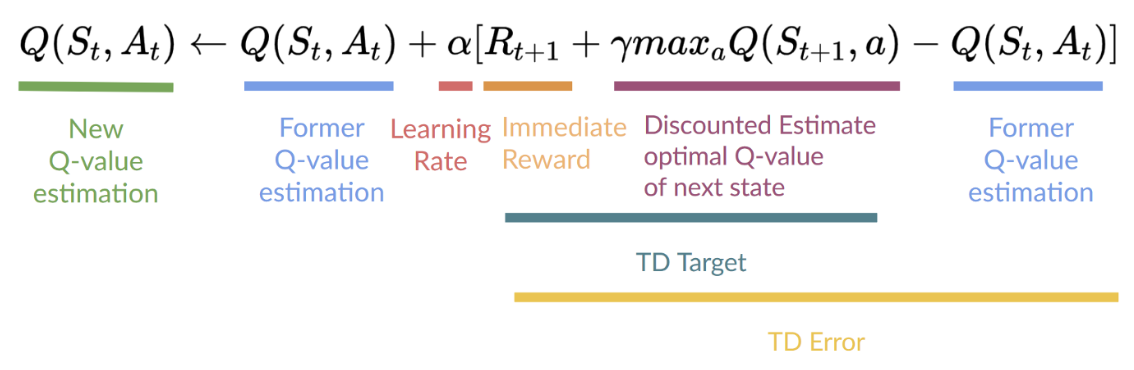

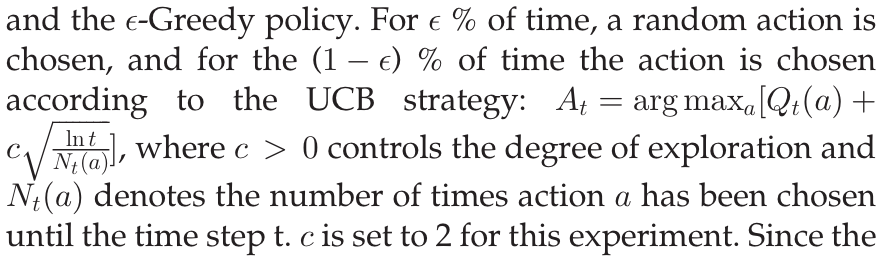

# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import noise_estimator

The initial agent and environment implementation had multiple states. We then decided on a stateless setting. At that point, it was easier to create a new `_stateless` wrapper class, which inherits from the multi classes, but sets `num_states=1`

In [3]:
from ucbq_agent_stateless import UCBQAgent
from ucbq_environment_stateless import ModifiedRandomEnvironment

In [4]:
import matplotlib.pyplot as plt

import utils
from utils import *
from modified_pendulum_processor import ModifiedPendulumProcessor

# Params

In [5]:
params_new = {
    'plots': True,
    }

params = default_params() | params_new

# Noiseless rewards UCB Q-learning

Q-table:
[[-6.2481 -5.4558 -6.1213 -6.5659 -8.115  -7.5567 -8.3065]]
Number of times action was taken:
[[ 8. 71.  9.  5.  5.  4.  3.]]
Total timesteps:
99


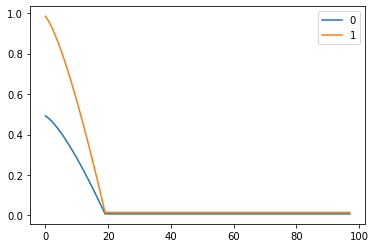

In [6]:
params_new = {
    'noise': False,
    }
params = params | params_new

agent = UCBQAgent(params=params)

q_values_for_chart, rewards, episode_length, selected_action, reward_processor, alphas, epsilons = runner(agent=agent, params=params)
utils.print_agent_stats(agent)
pd.DataFrame([alphas, epsilons]).T.plot()

100%|██████████| 100/100 [00:00<00:00, 368.55it/s]


Accuracy: 100.0
Mean episode length: 83.01


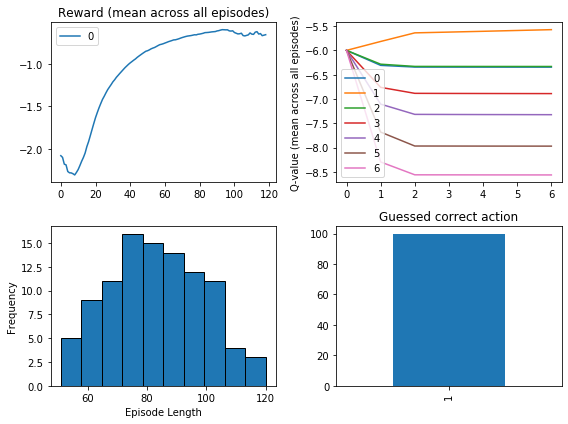

array([-6.344087, -5.573977, -6.330785, -6.888367, -7.321992, -7.968498,
       -8.560575])

In [7]:
params_new = {
    'noise': False,
    }
params = params | params_new

plot_mean_q_values(params=params)

# Noisy rewards
- rewards are now noisy
- q-learner hasn't changed

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

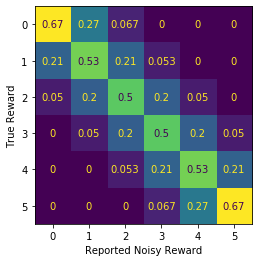

Is invertible: 


True

In [9]:
params = default_params()
num_actions = params['num_actions']
correct_action = params['correct_action']
# params['diag'] = 0.69
# Confusion matrix used as noise
num_unique_rewards = utils.get_num_unique_rewards(num_actions=num_actions, correct_action=correct_action)
cmat = ModifiedPendulumProcessor(num_unique_rewards=num_unique_rewards).initialize_cmat()
disp = ConfusionMatrixDisplay(cmat)
ax = disp.plot(colorbar=False).ax_
ax.set_ylabel('True Reward')
ax.set_xlabel('Reported Noisy Reward') 
plt.show()
print('Is invertible: ')
noise_estimator.is_invertible(cmat)

100%|██████████| 100/100 [00:00<00:00, 215.74it/s]


Accuracy: 97.0
Mean episode length: 118.71
Last reward processor:
Estimated confusion matrix:


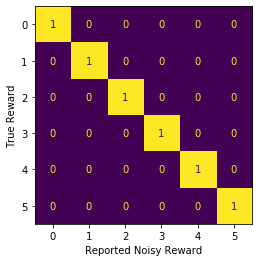

Reward sets:
(0, 0): [-1, 0, -1, -1, -1, -1, 0, -1, 0, -1, -2, -1, -1, -2, -1, -2, -2, -1, -2, -1, -1, -1, -2, -1, -3, 0, -1, 0, -1, 0]
(0, 1): [0, 0, -1, -2, 0, -1, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -2, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, -2, 0, -1, -1, -1, -1, 0, 0, 0, -1, 0, 0, -1, -2, 0, -1]
(0, 2): [-3, -1, 0, -3, -1, 0, -1, 0, -2, -1]
(0, 3): [-2, -3, -1, -2, -2]
(0, 4): [-2, -3, -2, -3, -3, -2]
(0, 5): [-5, -5]
(0, 6): [-5]
Reward set counts:
Key (0, 0): 30 items
Key (0, 1): 65 items
Key (0, 2): 10 items
Key (0, 3): 5 items
Key (0, 4): 6 items
Key (0, 5): 2 items
Key (0, 6): 1 items


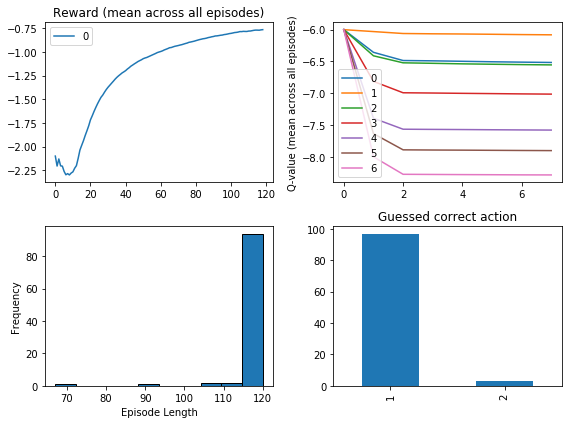

array([-6.515466, -6.080989, -6.553625, -7.012859, -7.577891, -7.900553,
       -8.282786])

In [10]:
# res = {'target': 95.89999999999999, 'params': {'alpha': 0.8236118040381998, 'alpha_decay': 243.0544785033269, 'alpha_min': 0.5113965695937486, 'epsilon': 0.25289603267158034, 'epsilon_decay': 70.53090930872196, 'epsilon_min': 0.044310479986752194, 'gamma': 0.8871072251030447, 'surrogate_c_interval': 67.76179038423699}}
# params=res['params']
params_new = {
    'noise': True,
    'plots': True,
    }
params = default_params() | params_new
plot_mean_q_values(params=params)

# Surrogate rewards

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 11.23it/s]


Accuracy: 100.0
Mean episode length: 1200.0
Last reward processor:
Estimated confusion matrix:


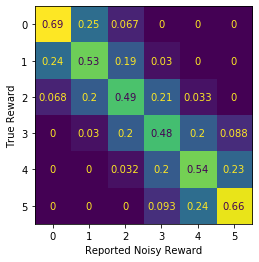

Reward sets:
(0, 0): [-3, -3, 0, -2, -1, -1, 0, 0, -1, -1, 0, 0, -1, -1, -2, -1, 0, -1, -1, -3, 0, -1, -1, 0, -1, 0, -1, 0, 0, -1, -2, -1, -1, -1, -1, -2, -1, -2, -1, -2, -2, -3, -1, 0, -2, -1, -1, -1, -1, 0, 0, -3, -1, -1, -1, 0, -2, 0, -1, -2, 0, -2, 0, 0, -1, -1, -1, -3, -1, -1, 0, 0, 0, -1, -1, 0, -2, 0, -2, -1, 0, 0, -1, -1, -1, 0, -1, -1, -1, -1, 0, 0, -2, -1]
(0, 1): [-1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, -1, -1, 0, -1, 0, -1, -2, 0, -1, -1, 0, -1, 0, -1, 0, 0, 0, -2, -2, -1, 0, -2, 0, -2, -1, 0, 0, -2, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, -1, 0, 0, -2, -1, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, -2, 0, -1, -1, 0, 0, -1, 0, 0, -1, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -2, 0, -1, 0, 0, -1, 0, -1, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -2, 0, 0, 0, 0, -1, 0, 0,

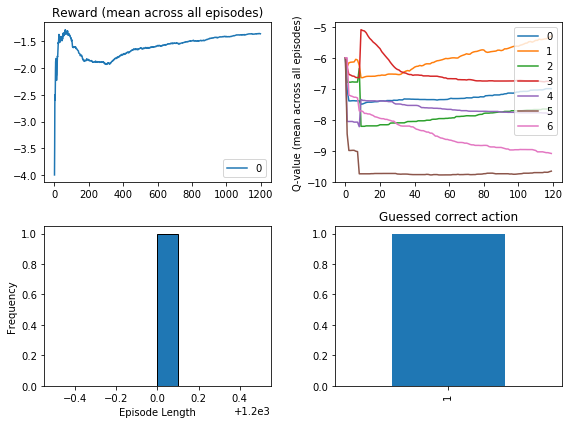

array([-6.9933, -5.2961, -7.6489, -6.7641, -7.8007, -9.6552, -9.0844])

In [11]:
# When we always pick at random, we never end up consistently picking the same action
# so the episode end is never triggered by. 
# Therefore the agent has enough observations to properly estimate the noise matrix
params_new ={
    'max_steps': 1200,
    'num_episodes': 1,
    'noise': True, 
    'surrogate': True, 
    'plots': True, 
    # epsilon min must be high, otherwise we never end up with a convertable matrix
    # and never end up using the surrogate rewards
    'epsilon_min': 0.5,
    # 'diag': 0.5,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 100/100 [00:00<00:00, 232.53it/s]


Accuracy: 5.0
Mean episode length: 66.52
Last reward processor:
Estimated confusion matrix:


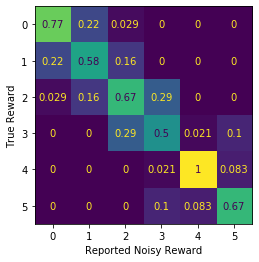

Reward sets:
(0, 0): [0, -2, -1, -2, 0, -1, -1, -1, -1]
(0, 1): [0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, -2, 0, 0, 0, 0, 0, 0, -1, 0, -2, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0]
(0, 2): [-1, -1, -1, 0, -1, -1, -1, -2, 0, 0]
(0, 3): [-1, -2, -3, -2, -2, -2]
(0, 4): [-2, -3, -5, -3, -2, -2, -3, -4, -3, -3, -3, -3, -2, -3, -2, -3, -2, -3, -3, -3, -2, -2, -2, -2, -2]
(0, 5): [-5, -3, -5]
(0, 6): [-4, -5, -5]
Reward set counts:
Key (0, 0): 9 items
Key (0, 1): 35 items
Key (0, 2): 10 items
Key (0, 3): 6 items
Key (0, 4): 25 items
Key (0, 5): 3 items
Key (0, 6): 3 items


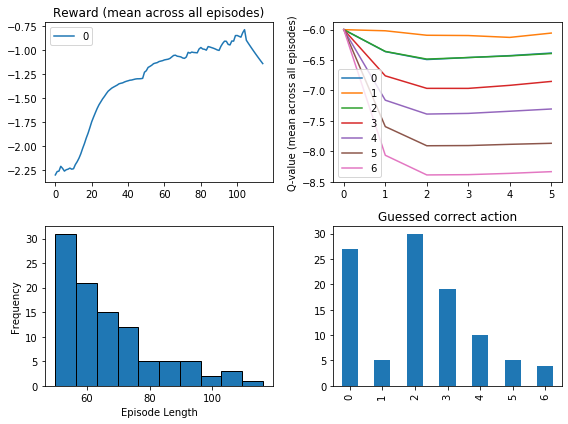

array([-6.384478, -6.05611 , -6.392527, -6.851107, -7.30447 , -7.868361,
       -8.334772])

In [12]:
params_new ={
    'max_steps': 120,
    'num_episodes': 100,
    'noise': True, 
    'surrogate': True, 
    'plots': True,
    'diag': 0.5
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 100/100 [00:00<00:00, 178.16it/s]


Accuracy: 12.0
Mean episode length: 67.5
Last reward processor:
Estimated confusion matrix:


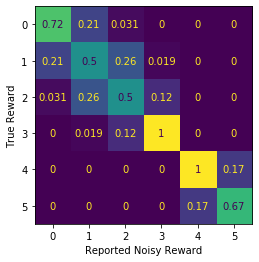

Reward sets:
(0, 0): [-1, -1, -2, -2, -2, 0, 0, -1]
(0, 1): [0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -2, -1, -2, 0, 0, 0, -1, 0, 0, -1, -1, 0, 0, 0, -1, 0]
(0, 2): [-1, 0, -1, -1, -2, -2, 0, -1, -1, -1, -1, -1, 0, -3, -1, -2, -2, -1, -1, -3, -2, -1, -3, -2, -1, 0, 0]
(0, 3): [-3, -2, -2, -1]
(0, 4): [-3, -3, -3]
(0, 5): [-4, -4]
(0, 6): [-5, -5, -4]
Reward set counts:
Key (0, 0): 8 items
Key (0, 1): 32 items
Key (0, 2): 27 items
Key (0, 3): 4 items
Key (0, 4): 3 items
Key (0, 5): 2 items
Key (0, 6): 3 items


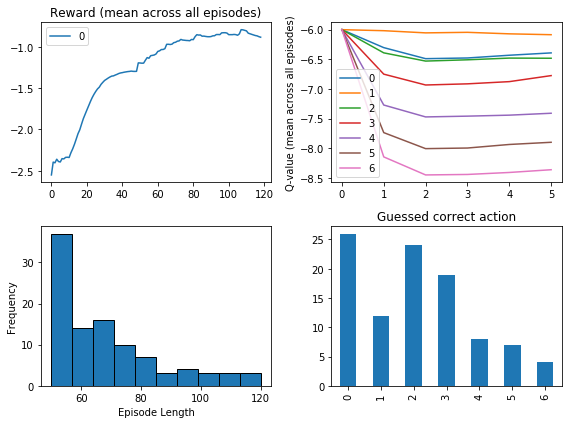

array([-6.392303, -6.085091, -6.482601, -6.775644, -7.411141, -7.901336,
       -8.364634])

In [13]:
params_new ={
    'noise': True, 
    'surrogate': True, 
    'plots': True, 
    # 'surrogate_c_interval': 10,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

# Sanity check

In [21]:
params = default_params()

print('Accuracy should be higher, timesteps should be lower')

params['noise'] = False
params['surrogate'] = False
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

params['noise'] = True
params['surrogate'] = False
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

params['noise'] = True
params['surrogate'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

Accuracy should be higher, timesteps should be lower


100%|██████████| 100/100 [00:00<00:00, 324.90it/s]


12.0 93.02


100%|██████████| 100/100 [00:00<00:00, 409.64it/s]


22.0 65.56


100%|██████████| 100/100 [00:00<00:00, 327.31it/s]

4.0 63.63
